<a href="https://colab.research.google.com/github/Quddos/machine-learning/blob/main/Implementation_of_feature_reduction_using_Principal_Component_Analysis_(PCA)_on_a_suitable_dataset_(e_g_%2C_the_Iris_dataset)_Visualize_the_data_before_and_after_dimensionality_reduction_and_analyze_the_variance_retained.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Implementation of feature reduction using Principal Component Analysis
(PCA) on a suitable dataset (e.g., the Iris dataset). Visualize the data
before and after dimensionality reduction and analyze the variance
retained by the principal components.


Explained Variance Ratios:
PC1: 72.96%
PC2: 22.85%
PC3: 3.67%
PC4: 0.52%

Total Variance Retained with PC1+PC2: 95.81%


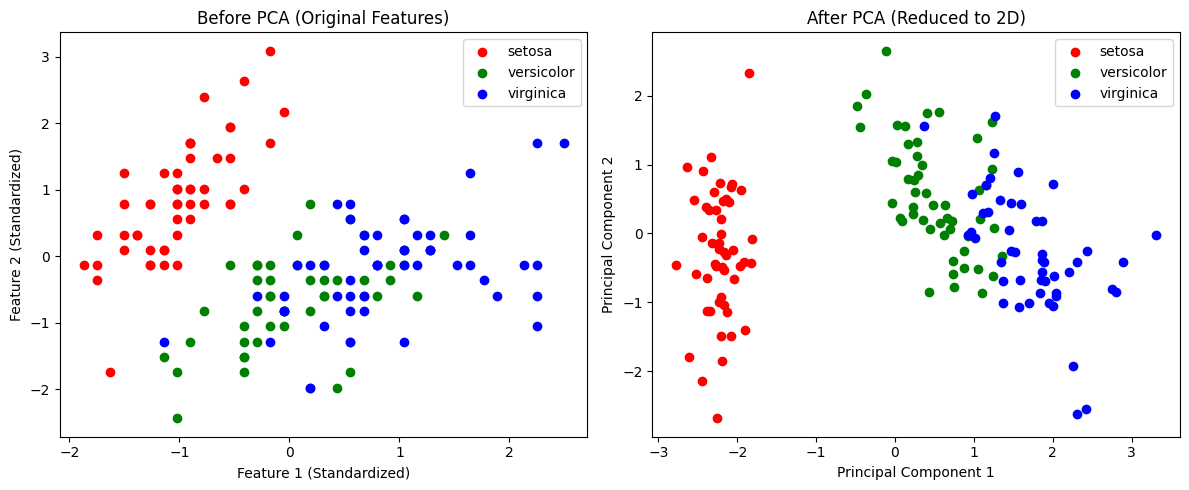

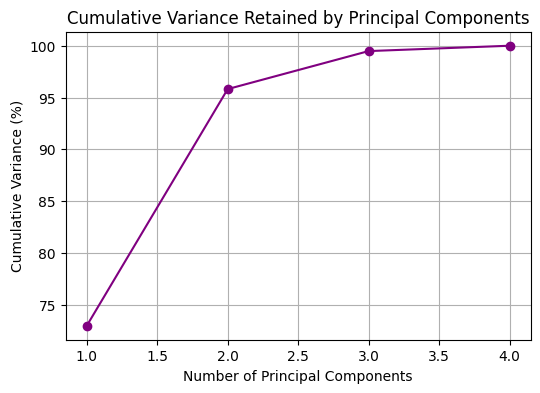

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# ------------------------------
# Step 1: Load and standardize data
# ------------------------------
iris = load_iris()
X = iris.data     # 4 features
y = iris.target   # labels (0,1,2)
labels = iris.target_names

# Standardization (mean=0, std=1)
X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
X_scaled = (X - X_mean) / X_std

# ------------------------------
# Step 2: Covariance matrix & eigen decomposition
# ------------------------------
cov_matrix = np.cov(X_scaled.T)
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Sort eigenvalues/eigenvectors descending
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

# ------------------------------
# Step 3: Variance retained (Explained Variance Ratio)
# ------------------------------
explained_variance_ratio = eigenvalues / np.sum(eigenvalues)
cumulative_variance = np.cumsum(explained_variance_ratio)

print("\nExplained Variance Ratios:")
for i, ratio in enumerate(explained_variance_ratio):
    print(f"PC{i+1}: {ratio*100:.2f}%")

print(f"\nTotal Variance Retained with PC1+PC2: {cumulative_variance[1]*100:.2f}%")

# ------------------------------
# Step 4: Reduce dimensions (to 2D)
# ------------------------------
W = eigenvectors[:, :2]     # top 2 eigenvectors
X_pca = np.dot(X_scaled, W) # projection onto new axes

# ------------------------------
# Step 5: Visualization
# ------------------------------

plt.figure(figsize=(12,5))

# (a) Before PCA (using first two features)
plt.subplot(1,2,1)
for target, color, label in zip([0,1,2], ['r','g','b'], labels):
    plt.scatter(X_scaled[y==target,0], X_scaled[y==target,1], c=color, label=label)
plt.title("Before PCA (Original Features)")
plt.xlabel("Feature 1 (Standardized)")
plt.ylabel("Feature 2 (Standardized)")
plt.legend()

# (b) After PCA (2 Principal Components)
plt.subplot(1,2,2)
for target, color, label in zip([0,1,2], ['r','g','b'], labels):
    plt.scatter(X_pca[y==target,0], X_pca[y==target,1], c=color, label=label)
plt.title("After PCA (Reduced to 2D)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()

plt.tight_layout()
plt.show()

# ------------------------------
# Step 6: Plot variance explained
# ------------------------------
plt.figure(figsize=(6,4))
plt.plot(range(1, len(eigenvalues)+1), cumulative_variance*100, marker='o', color='purple')
plt.title("Cumulative Variance Retained by Principal Components")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Variance (%)")
plt.grid(True)
plt.show()
